# lasso-ridge-elastic net regression

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
 df = pd.read_csv("Advertising.csv")

In [3]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [4]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
X = df.drop('sales',axis=1)
y = df['sales']

In [6]:
X.isna().sum()

TV           0
radio        0
newspaper    0
dtype: int64

In [7]:
np.mean(df['sales'])

14.022500000000003

# Polynomial Conversion

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [9]:
polynomial_converter = PolynomialFeatures(degree=3,include_bias=False)

In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
dtypes: float64(3)
memory usage: 4.8 KB


In [11]:
X.keys()

Index(['TV', 'radio', 'newspaper'], dtype='object')

In [12]:
poly_features = polynomial_converter.fit_transform(X)

### Train | Test Split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

## Scaling the Data


In [14]:
scaler = StandardScaler()

In [15]:
scaler.fit(X_train)

StandardScaler()

In [16]:
X_train = scaler.transform(X_train)

In [17]:
X_test = scaler.transform(X_test)

## Ridge Regression

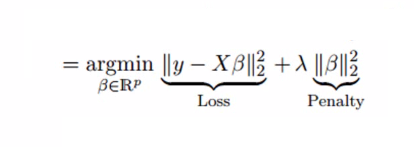

In [18]:
from sklearn.linear_model import Ridge

In [19]:
ridge_model = Ridge(alpha=10)

In [20]:
ridge_model.fit(X_train,y_train)

Ridge(alpha=10)

In [21]:
test_predictions = ridge_model.predict(X_test)

In [22]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [23]:
#mean absolute error
MAE

0.5774404204714177

In [24]:
#root mean square error
RMSE

0.894638646131968

In [25]:
# Training Set Performance
train_predictions = ridge_model.predict(X_train)
MAE = mean_absolute_error(y_train,train_predictions)
MAE

0.5288348183025332

## Choosing an alpha value with Cross-Validation

In [26]:
from sklearn.linear_model import RidgeCV

In [27]:
help(RidgeCV)

Help on class RidgeCV in module sklearn.linear_model._ridge:

class RidgeCV(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, _BaseRidgeCV)
 |  RidgeCV(alphas=(0.1, 1.0, 10.0), *, fit_intercept=True, normalize=False, scoring=None, cv=None, gcv_mode=None, store_cv_values=False, alpha_per_target=False)
 |  
 |  Ridge regression with built-in cross-validation.
 |  
 |  See glossary entry for :term:`cross-validation estimator`.
 |  
 |  By default, it performs efficient Leave-One-Out Cross-Validation.
 |  
 |  Read more in the :ref:`User Guide <ridge_regression>`.
 |  
 |  Parameters
 |  ----------
 |  alphas : ndarray of shape (n_alphas,), default=(0.1, 1.0, 10.0)
 |      Array of alpha values to try.
 |      Regularization strength; must be a positive float. Regularization
 |      improves the conditioning of the problem and reduces the variance of
 |      the estimates. Larger values specify stronger regularization.
 |      Alpha corresponds to ``1 / (2C)`` in other linear mod

#### All scorer objects follow the convention that higher return values are better than lower return values. Thus metrics which measure the distance between the model and the data, like metrics. mean_squared_error, are available as neg_mean_squared_error which return the negated value of the metric.

In [28]:
ridge_cv_model = RidgeCV(alphas=(0.1, 1.0, 10.0),scoring='neg_mean_absolute_error')

In [29]:
# The more alpha options you pass, the longer this will take.
# Fortunately our data set is still pretty small
ridge_cv_model.fit(X_train,y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), scoring='neg_mean_absolute_error')

In [30]:
ridge_cv_model.alpha_

0.1

In [31]:
test_predictions = ridge_cv_model.predict(X_test)

In [32]:
MAE  = mean_absolute_error(y_test,test_predictions)
MSE  = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [33]:
MAE

0.42737748843313855

In [34]:
RMSE

0.6180719926906028

In [35]:
# Training Set Performance
# Training Set Performance
train_predictions = ridge_cv_model.predict(X_train)
MAE = mean_absolute_error(y_train,train_predictions)
MAE

0.3094132105668577

In [36]:
ridge_cv_model.coef_

array([ 5.40769392,  0.5885865 ,  0.40390395, -6.18263924,  4.59607939,
       -1.18789654, -1.15200458,  0.57837796, -0.1261586 ,  2.5569777 ,
       -1.38900471,  0.86059434,  0.72219553, -0.26129256,  0.17870787,
        0.44353612, -0.21362436, -0.04622473, -0.06441449])

## Lasso Regression

Lasso regression is a regularization technique. It is used over regression methods for a more accurate prediction. This model uses shrinkage. Shrinkage is where data values are shrunk towards a central point as the mean. The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters). used when there are high levels of collinearity. it also performs feature selection.

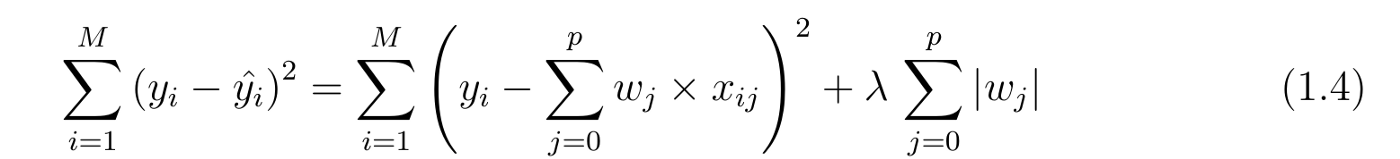

In [37]:
from sklearn.linear_model import LassoCV

In [38]:
lasso_cv_model = LassoCV(eps=0.1,n_alphas=100,cv=5)

In [39]:
lasso_cv_model.fit(X_train,y_train)

LassoCV(cv=5, eps=0.1)

In [40]:
lasso_cv_model.alpha_

0.4943070909225828

In [41]:
test_predictions = lasso_cv_model.predict(X_test)

In [42]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [43]:
MAE

0.6541723161252854

In [44]:
MSE

1.2787088713079842

In [45]:
RMSE

1.130800102276253

In [46]:
# Training Set Performance
# Training Set Performance
train_predictions = lasso_cv_model.predict(X_train)
MAE = mean_absolute_error(y_train,train_predictions)
MAE

0.6912807140820695

In [47]:
lasso_cv_model.coef_

array([1.002651  , 0.        , 0.        , 0.        , 3.79745279,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

## Elastic Net

combines the regularization of both lasso and Ridge.

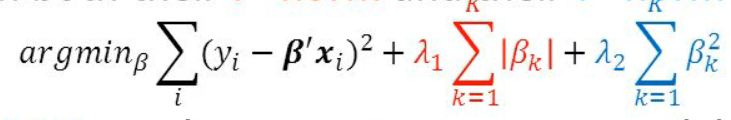

In [48]:
from sklearn.linear_model import ElasticNetCV

In [49]:
help(ElasticNetCV)

Help on class ElasticNetCV in module sklearn.linear_model._coordinate_descent:

class ElasticNetCV(sklearn.base.RegressorMixin, LinearModelCV)
 |  ElasticNetCV(*, l1_ratio=0.5, eps=0.001, n_alphas=100, alphas=None, fit_intercept=True, normalize=False, precompute='auto', max_iter=1000, tol=0.0001, cv=None, copy_X=True, verbose=0, n_jobs=None, positive=False, random_state=None, selection='cyclic')
 |  
 |  Elastic Net model with iterative fitting along a regularization path.
 |  
 |  See glossary entry for :term:`cross-validation estimator`.
 |  
 |  Read more in the :ref:`User Guide <elastic_net>`.
 |  
 |  Parameters
 |  ----------
 |  l1_ratio : float or list of float, default=0.5
 |      float between 0 and 1 passed to ElasticNet (scaling between
 |      l1 and l2 penalties). For ``l1_ratio = 0``
 |      the penalty is an L2 penalty. For ``l1_ratio = 1`` it is an L1 penalty.
 |      For ``0 < l1_ratio < 1``, the penalty is a combination of L1 and L2
 |      This parameter can be a li

In [50]:
elastic_model = ElasticNetCV(l1_ratio=[.1, .5, .7,.9, .95, .99, 1],tol=0.01)

In [51]:
elastic_model.fit(X_train,y_train)

ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], tol=0.01)

In [52]:
elastic_model.l1_ratio_

1.0

In [53]:
test_predictions = elastic_model.predict(X_test)

In [54]:
#evaluation metrics
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [55]:
MAE

0.5663262117569448

In [56]:
RMSE

0.7485546215633719

In [57]:
# Training Set Performance
# Training Set Performance
train_predictions = elastic_model.predict(X_train)
MAE = mean_absolute_error(y_train,train_predictions)
MAE

0.4307582990472367

In [58]:
elastic_model.coef_

array([ 3.78993643,  0.89232919,  0.28765395, -1.01843566,  2.15516144,
       -0.3567547 , -0.271502  ,  0.09741081,  0.        , -1.05563151,
        0.2362506 ,  0.07980911,  1.26170778,  0.01464706,  0.00462336,
       -0.39986069,  0.        ,  0.        , -0.05343757])